# Zillow Home Value Prediction EDA

In [2]:
'''This script loads, explores, and visualizes the Home Value Prediction datasets'''

__author__ = 'Luke Marston'
__email__ = 'lmarston2017@gmail.com'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


### Load the Raw Data

The data we'll be sing is the Zillow Home Price dataset that was used in a Kaggle competition. The dataset was downloaded and put in a directory called raw_data.

In [4]:
!ls -lh raw_data

You can see that the files are broken into properties and train files, with one each for 2016 and 2017. There is also a data dictionary which will help with interpreting the meaning of the feature/variables contained in the data files.

The raw data is zipped, meaning it has been compressed to make downloading if faster (and also takes up less memory on servers). It will be helpful to unzip.

### Install Dependencies

The compute environment I'm using comes with Anaconda installed, so we'll use the conda command to install the packages required for this project.

In [8]:
%%bash

conda install pandas xlrd matplotlib scikit-learn

Solving environment: ...working... done

# All requested packages already installed.



### Data Prep

In [5]:
import pandas as pd

We will write helper functions to read in the Zillow data. These are in a file called helpers.py in the modules directory in the root of the project. 

### Calling our Helper Functions

Putting helper functions in a script instead of the notebook because:

* We might want to use that function in another notebook, and this way we won't have to copy and paste the funciton definition
* If we need to make a change to the function, we only have to do in one place

In [6]:
# add the modules directory to the python path, or the set of the places the python interpreter loks for the code files
import sys
sys.path.insert(0, './modules')

#now read in the functions
from helpers import read_in_dataset, merge_dataset


If we also want to view the source code of the function in the notebook:

In [7]:
#inline
import inspect
print(inspect.getsource(read_in_dataset))

def read_in_dataset(dset, verbose=False):
    
    """Read in one of the Zillow datasets (train or properties)

    Keyword arguments:
    dset -- a string in {properties_2016, properties_2017, train_2016, train_2017}
    verbose -- whether or not to print info about the dataset
    
    Returns:
    a pandas dataframe
    """
    
    df = pd.read_csv('unzipped_data/{0}.csv'.format(dset))
    
    if verbose:
        print('\n{0:*^80}'.format(' Reading in the {0} dataset '.format(dset)))
        print("\nit has {0} rows and {1} columns".format(*df.shape))
        print('\n{0:*^80}\n'.format(' It has the following columns '))
        print(df.columns)
        print('\n{0:*^80}\n'.format(' The first 5 rows look like this '))
        print(df.head())
        
    return df



In [13]:
#using ipython
read_in_dataset??

### Examine the Data

### Read in the Data

These are the files we're working with:

In [8]:
!ls -lh unzipped_data/

total 2696776
-rwxr-xr-x@ 1 lmarston  staff   619M Dec 11 03:28 properties_2016.csv
-rwxr-xr-x@ 1 lmarston  staff   620M Dec 11 03:29 properties_2017.csv
-rwxr-xr-x@ 1 lmarston  staff    60M Dec 11 03:30 sample_submission.csv
-rwxr-xr-x@ 1 lmarston  staff   2.3M Apr 28 07:17 train_2016.csv
-rwxr-xr-x@ 1 lmarston  staff   2.7M Dec 11 03:30 train_2017.csv
-rwxr-xr-x@ 1 lmarston  staff    19K Dec 11 03:30 zillow_data_dictionary.xlsx


(Optional) Load in the data guide for reference:

In [16]:
dataguide = pd.read_excel('unzipped_data/zillow_data_dictionary.xlsx')
dataguide.head()

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home


Now read in the data files we'll use. The 2017 files weren't actually part of the original dataset published with the competition, so they will be ignored for now.

In [17]:
!free -m

/bin/sh: free: command not found


#### Properties

This dataset has information about the properties we'll be trying to make predictions on.

In [12]:
properties = read_in_dataset("properties_2016", verbose=True)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):



******************** Reading in the properties_2016 dataset ********************

it has 2985217 rows and 58 columns

************************* It has the following columns *************************

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity

#### Target Variable and Transaction Date

This dataset includes our Target variable as well as a key predictor (or feature) 'transactiondate'

In [10]:
train_raw = read_in_dataset("train_2016_v2", verbose=True)


********************* Reading in the train_2016_v2 dataset *********************

it has 90275 rows and 3 columns

************************* It has the following columns *************************

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')

*********************** The first 5 rows look like this ************************

   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02


In [22]:
!free -m

/bin/sh: free: command not found


### Explore the Raw Datasets

In [23]:
#How many train records don't have a matching property
len(set(train_raw.parcelid) - set(properties.parcelid))

0

In [24]:
#How many properties don't have a matching train record
len(set(properties.parcelid) - set(train_raw.parcelid))

2895067

So there are a lot (almost 3 million) properties that don't have a corresponding target. For now, they will be separated out so we don't have to carry them around in memory.

### Make Dataset for Analysis

There's a lot of data in the properties dataset that we won't be using (the properties didn't sell so we don't know what the target values are). To improve the speed of loading in the data and reducing the memory, we'll create a file only the properties and sales records needed for training.

In [25]:
# inspect the function made for this
print(inspect.getsource(merge_dataset))

def merge_dataset(train, properties):
    
    """Merge the train and properties datasets. Both need to have a common key `parcelid`

    Keyword arguments:
    train -- the dataframe of transactions
    properties -- the dataframe of properties
    
    Returns:
    a pandas dataframe
    """

    train_data_merged = train.merge(properties, how='left', on='parcelid')
    
    return train_data_merged



In [13]:
#merge the data and remove the raw datasets
train_data_merged = merge_dataset(train_raw, properties)
del train_raw
del properties

In [27]:
train_data_merged.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


Now this what we'll call our modeling file because it has all the data needed to build the model. Next, we'll put it in a directory called derived_data so we can read it in other notebooks.

In [28]:
# make directory to hold derived datasets
!mkdir -p derived_data

In [29]:
# write out the training data to csv so we can load it into other notebooks
train_data_merged.to_csv('derived_data/train_data_merged_2016.csv', index=False)

## Data Exploration 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('derived_data/train_data_merged_2016.csv')

In [32]:
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [33]:
df.shape

(90275, 60)

### Check the Transaction Date Range

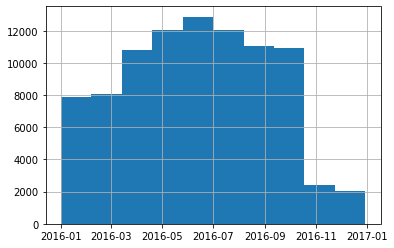

In [35]:
pd.to_datetime(df.transactiondate).hist()

In [36]:
pd.to_datetime(df.transactiondate).min()

Timestamp('2016-01-01 00:00:00')

In [37]:
pd.to_datetime(df.transactiondate).max()

Timestamp('2016-12-30 00:00:00')

### Check for duplicates parcels

In [39]:
#is there one record per parcel?
df.parcelid.nunique() == len(df)

False

In [16]:
# take a look at some of the ones that have multiple records
counts_per_parcel = df.groupby('parcelid').size()
more_than_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel > 1].index)]
only_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel == 1].index)]

#there are 249 of them 
print(more_than_one_sale.parcelid.nunique())

# and look at them
more_than_one_sale.head(10)

124


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
496,13850164,-0.1567,2016-01-05,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
497,13850164,-0.0460,2016-06-29,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
781,14677191,-0.3682,2016-01-06,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
782,14677191,-0.0845,2016-09-12,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
813,11005771,-0.0131,2016-01-06,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
814,11005771,0.0545,2016-06-17,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
967,11183209,-0.0481,2016-01-07,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
968,11183209,-0.0070,2016-09-14,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
1164,11554091,-0.1696,2016-01-07,NaN,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13
1165,11554091,-0.0954,2016-07-05,NaN,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13


It appears that some homes were sold twice during the period that the training data was captured. We have a few options with this data, and it is important to discuss the tradeoffs between them as choosing the correct way to go (usually no right and wrong answer).

We don't want the model to overweight properties that have more than one record because we want it to perform well on our hold out set, and on the other hand, there is valuable information in knowing that the only difference between two records (besides the target variable) is the date field.

So our options for constructing the dataset for training our model are:
* Use the most recent sale record
* Use the oldest sales record
* Use both sales records
* Use a random sales record
* Engineer a feature from the information contained, and then choose one of the options above

Note that only a hundred or so of the ~90,000 properties have multiple sales records, so it probably isn't a big deal which options we choose, so we will take the simple approach for now, which is taking a random sales record for each parcel with more than one sales record.

In [41]:
# first ensure we've accurately separated the records
assert len(df) == (len(more_than_one_sale) + len(only_one_sale))

#then remove the duplicte records by choosing a random sale form properties with more than one
reduced_df = more_than_one_sale.sample(frac=1, random_state=0).groupby('parcelid').head(1)
reduced_df = pd.concat([only_one_sale, reduced_df])

In [42]:
# check if the same parcel IDs exist in the orginal data as the reduced data
assert set(reduced_df.parcelid) == set(df.parcelid)

In [43]:
reduced_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


Now lets take the logic we defined above and package it into a function called filter_duplicate_parcels:

In [45]:
import sys
sys.path.insert(0, '.modules')
# now read in the function
from helpers import filter_duplicate_parcels
print(inspect.getsource(filter_duplicate_parcels))

def filter_duplicate_parcels(df, random_state=0):
    """filter the merged train and properties datasets to only include one record per parcel.
    
    Intended only for use on the training data for building the model

    Keyword arguments:
    df -- the result of `merge_dataset`
    random_state -- the random seed to be passed to the `pandas.DataFrame.sample()` method
    
    Returns:
    a pandas dataframe
    """
 
    counts_per_parcel = df.groupby('parcelid').size()
    more_than_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel > 1].index)]
    only_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel == 1].index)]
    reduced_df = more_than_one_sale.sample(frac=1, random_state=random_state).groupby('parcelid').head(1)
    reduced_df = pd.concat([only_one_sale, reduced_df])
    
    return reduced_df



### Explore Null Values 

Null values are difficult to deal with at times, but they also can contain valuable info. Machine Learning algorithms will complain about them, so it may be in our interest to discard the Null Values. Another (better) approach would be to encode them in a way  that the algorithms can understand. This is usually easier with nonlinear models like trees, neural nets, etc.

In [47]:
reduced_df.isnull().sum().sort_values(ascending=False).head(15)

buildingclasstypeid         90134
finishedsquarefeet13        90117
basementsqft                90107
storytypeid                 90107
yardbuildingsqft26          90055
fireplaceflag               89930
architecturalstyletypeid    89890
typeconstructiontypeid      89852
finishedsquarefeet6         89731
decktypeid                  89492
poolsizesum                 89184
pooltypeid10                88991
pooltypeid2                 88946
taxdelinquencyyear          88375
taxdelinquencyflag          88375
dtype: int64

In [48]:
reduced_df.isnull().sum().sort_values(ascending=True).head(15)

parcelid                  0
longitude                 0
propertylandusetypeid     0
rawcensustractandblock    0
regionidcounty            0
roomcnt                   0
latitude                  0
fips                      0
bathroomcnt               0
assessmentyear            0
transactiondate           0
logerror                  0
bedroomcnt                0
taxvaluedollarcnt         1
landtaxvaluedollarcnt     1
dtype: int64

### Explore Unique Values

A couple things we can look for:
* Are any of the features all of the same value? This won't be useful in a model, so we can discard them
* Are any features discrete with high cardinality? These wouldn't hold very much information because there would only be a few records for each "level" of the categorical feature

In [49]:
reduced_df.nunique().sort_values(ascending=False).head(25)

parcelid                        90150
taxamount                       85110
latitude                        73312
longitude                       71900
landtaxvaluedollarcnt           57066
taxvaluedollarcnt               55938
structuretaxvaluedollarcnt      55450
rawcensustractandblock          42643
censustractandblock             42398
lotsizesquarefeet               20016
calculatedfinishedsquarefeet     5102
finishedsquarefeet12             4982
propertyzoningdesc               1996
finishedsquarefeet15             1915
finishedsquarefeet50             1898
logerror                         1893
finishedfloor1squarefeet         1886
garagetotalsqft                   870
yardbuildingsqft17                567
regionidneighborhood              494
regionidzip                       388
finishedsquarefeet6               360
transactiondate                   352
poolsizesum                       273
regionidcity                      177
dtype: int64

Variables with High Cardinality:
* rawcensustractandblock
* censustractandblock
* propertyzoningdesc
* regionidneighborhood
* regionidzip

In [50]:
reduced_df.nunique(dropna=False).sort_values(ascending=True).head(20)

assessmentyear              1
poolcnt                     2
storytypeid                 2
fireplaceflag               2
pooltypeid7                 2
pooltypeid2                 2
buildingclasstypeid         2
pooltypeid10                2
decktypeid                  2
taxdelinquencyflag          2
hashottuborspa              2
regionidcounty              3
fips                        3
typeconstructiontypeid      4
threequarterbathnbr         5
numberofstories             5
fireplacecnt                6
airconditioningtypeid       7
architecturalstyletypeid    7
buildingqualitytypeid       9
dtype: int64

assessmentyear has only one unique value - Note

### Inspect the Target Variable

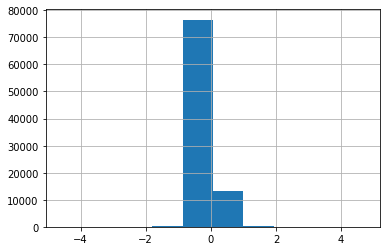

In [51]:
reduced_df.logerror.hist()

The Target looks a little bit like a Laplace Distribution. We should keep that in mind for choosing Machine Learning Algorithms and corresponding loss functions. If we plot the density on a log-scale, the target looks closer to a Normal Distribution.

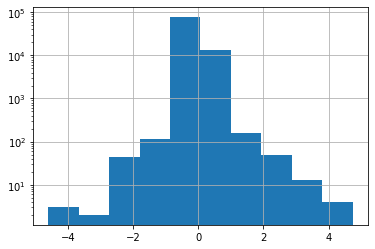

In [52]:
fig, ax = plt.subplots()
reduced_df.logerror.hist(ax=ax)
ax.set_yscale('log')